In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [3]:
data = pd.read_csv("../data/data_v0.2_intermediate(for checking)_with_status.csv")

In [4]:
df = data.copy()
df.shape

(8670, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8670 entries, 0 to 8669
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IncidentID   8670 non-null   int64  
 1   Open         8670 non-null   object 
 2   Add          8670 non-null   float64
 3   Close        8670 non-null   object 
 4   Year         8670 non-null   int64  
 5   DayOfYear    8670 non-null   int64  
 6   Month        8670 non-null   int64  
 7   DayOfWeek    8670 non-null   int64  
 8   time_period  8670 non-null   object 
 9   Building     8670 non-null   object 
 10  Location     8670 non-null   object 
 11  Latitude     8670 non-null   float64
 12  Longitude    8670 non-null   float64
 13  Incidents    8670 non-null   object 
 14  User         8670 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 1016.1+ KB


In [6]:
incident_type = df['Incidents'].unique()
print(incident_type)

['LOST AND FOUND' 'DAMAGED PROPERTY' 'SEXUAL INCIDENTS' 'STOLEN ITEMS'
 'EMERGENCY INCIDENTS']


In [7]:
df['Open'] = pd.to_datetime(df['Open'])
df['Open'].sort_values()
df.set_index('Open', inplace=True)
df = df.sort_index()
split_date = pd.Timestamp('2019-01-01')
df = df.loc[df.index >= split_date]
split_date = pd.Timestamp('2023-10-15')
df = df.loc[df.index <= split_date]
split_date = pd.Timestamp('2022-08-31')
train = df.loc[df.index <= split_date]
test = df.loc[df.index > split_date]

In [8]:
train.shape


(6209, 14)

In [9]:
test.shape

(1963, 14)

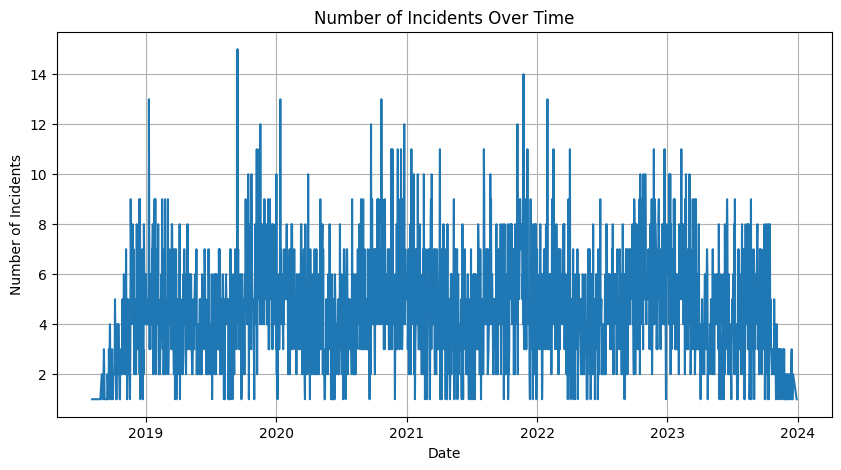

In [9]:
# Plot time series plot
df2 = data.copy()
df2['Open'] = pd.to_datetime(df2['Open'])
df2 = df2.sort_values(by='Open')
df2_count = df2['Open'].dt.date.value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(df2_count.index, df2_count.values)
plt.title('Number of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()


In [10]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [10]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [12]:
train.head()

,IncidentID,Add,Close,Year,DayOfYear,Month,DayOfWeek,time_period,Building,Location,Latitude,Longitude,Incidents,User
Open,,,,,,,,,,,,,,
2019-01-01 03:20:00,360,7.021033,2019-01-08 03:50:17,2019,1,1,1,day_weekday,NUHS TOWER BLOCK,FOS,1.292211,103.783603,DAMAGED PROPERTY,sec3
2019-01-01 09:22:00,682,7.194947,2019-01-08 14:02:43,2019,1,1,1,day_weekday,SCIENCE BLOCK 8,FOS,1.296071,103.779301,DAMAGED PROPERTY,sec5
2019-01-01 15:16:00,198,8.666965,2019-01-10 07:16:26,2019,1,1,1,day_weekday,COMPUTING BLOCK 3,SOC,1.294840,103.774590,DAMAGED PROPERTY,sec4
2019-01-01 16:36:00,907,2.123685,2019-01-03 19:34:06,2019,1,1,1,day_weekday,KENT RIDGE HALL (BLOCK E),HALL,1.291836,103.774219,EMERGENCY INCIDENTS,sec4
2019-01-01 21:34:00,80,4.036756,2019-01-05 22:26:56,2019,1,1,1,day_weekday,DATA-CENTRE-NUS HIGH SCHOOL,SOC,1.296770,103.780296,LOST AND FOUND,sec1


In [13]:
daily_incidents = train['IncidentID'].resample('D').count()  


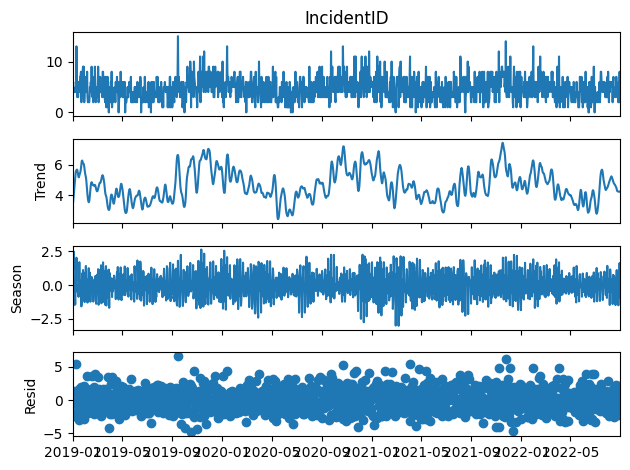

In [14]:
# Apply STL decomposition

stl = sm.tsa.STL(daily_incidents,seasonal=7) 
result = stl.fit()

# Plot the decomposed components
fig = result.plot()
plt.show()

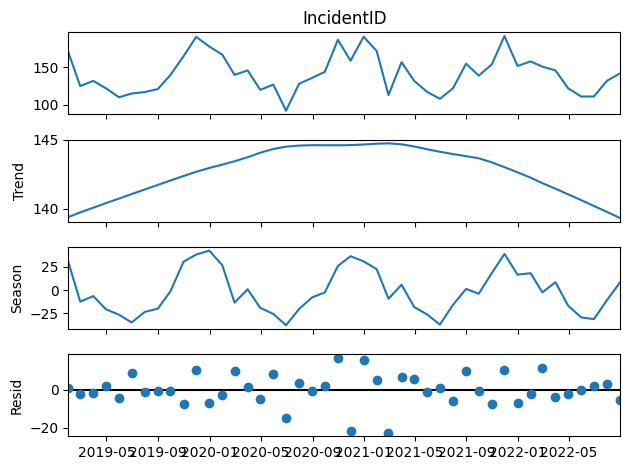

In [15]:
monthly_incidents = train['IncidentID'].resample('M').count()  
# Apply STL decomposition

stl = sm.tsa.STL(monthly_incidents)  
result = stl.fit()

# Plot the decomposed components
fig = result.plot()
plt.show()

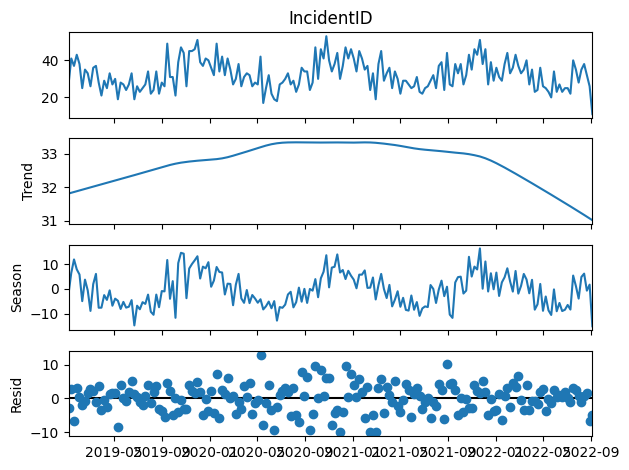

In [11]:
weekly_incidents = train['IncidentID'].resample('W').count() 
# Apply STL decomposition

stl = sm.tsa.STL(weekly_incidents,seasonal=31)  
result = stl.fit()

# Plot the decomposed components
fig = result.plot()
plt.show()

In [15]:
test_weekly_incidents = test['IncidentID'].resample('W').count() 


<Figure size 640x480 with 0 Axes>

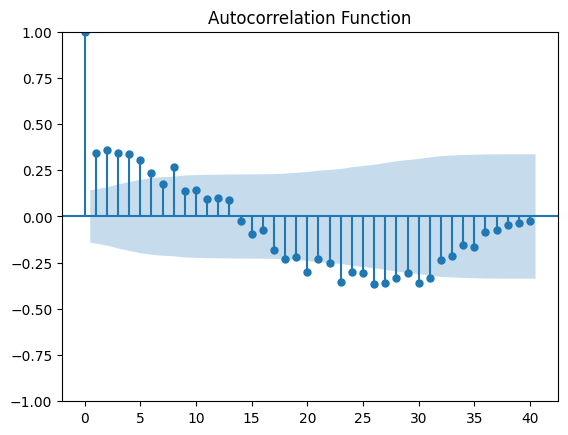

<Figure size 640x480 with 0 Axes>

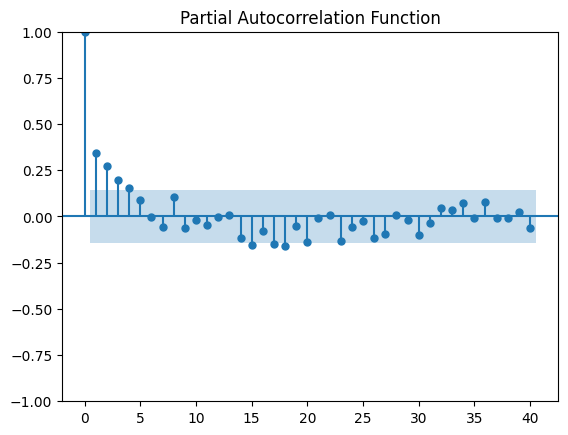

In [17]:
plt.figure()
plot_acf(weekly_incidents, lags=40, alpha=0.05)  
plt.title('Autocorrelation Function')

# Plot PACF
plt.figure()
plot_pacf(weekly_incidents, lags=40, alpha=0.05)  
plt.title('Partial Autocorrelation Function')

plt.show()

In [61]:
# we will examine forecasting weekly counts
# trend seems constant after 2019 so we can use a naive method to estimate trend


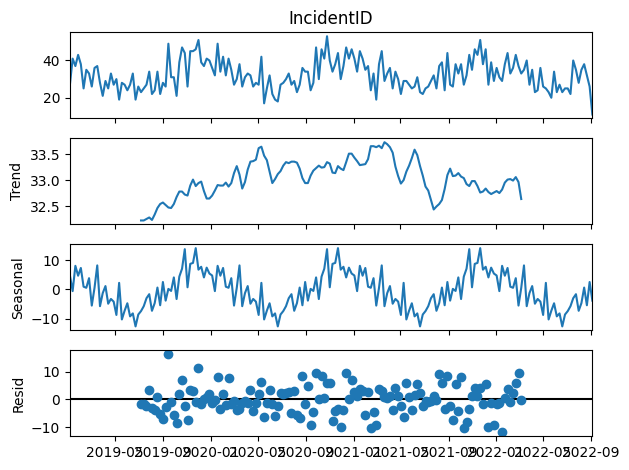

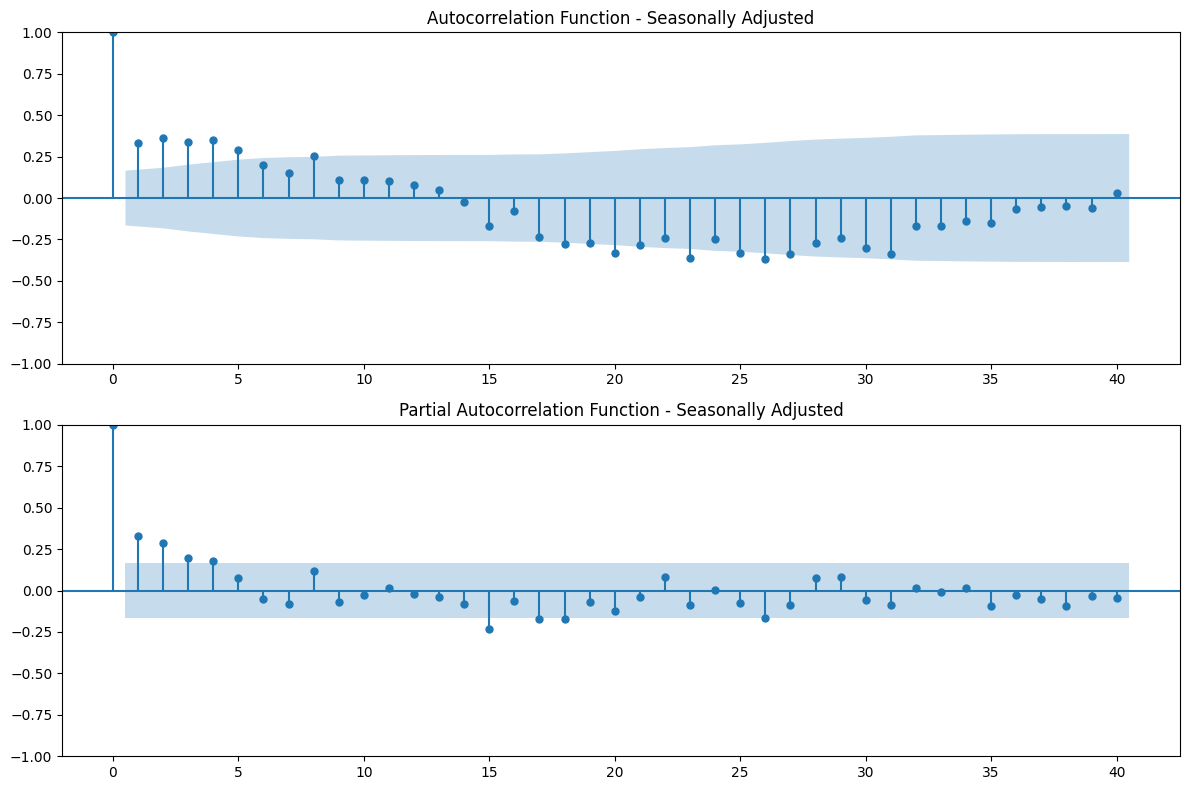

In [62]:
decomposition = seasonal_decompose(weekly_incidents, model='additive', period=52)  # Weekly data, so period is 52
detrended = weekly_incidents - decomposition.trend
detrended = detrended.dropna()  # Drop NA values that result from the decomposition
decomposition.plot()

#seasonally_differenced = detrended - detrended.shift(52)
#seasonally_differenced = seasonally_differenced.dropna()

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(detrended, lags=40, ax=ax[0])  # 2 years of lags
ax[0].set_title('Autocorrelation Function - Seasonally Adjusted')

plot_pacf(detrended, lags=40, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function - Seasonally Adjusted')

plt.tight_layout()
plt.show()

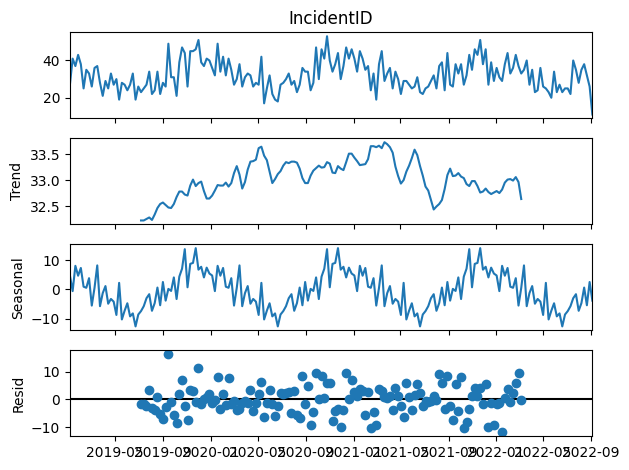

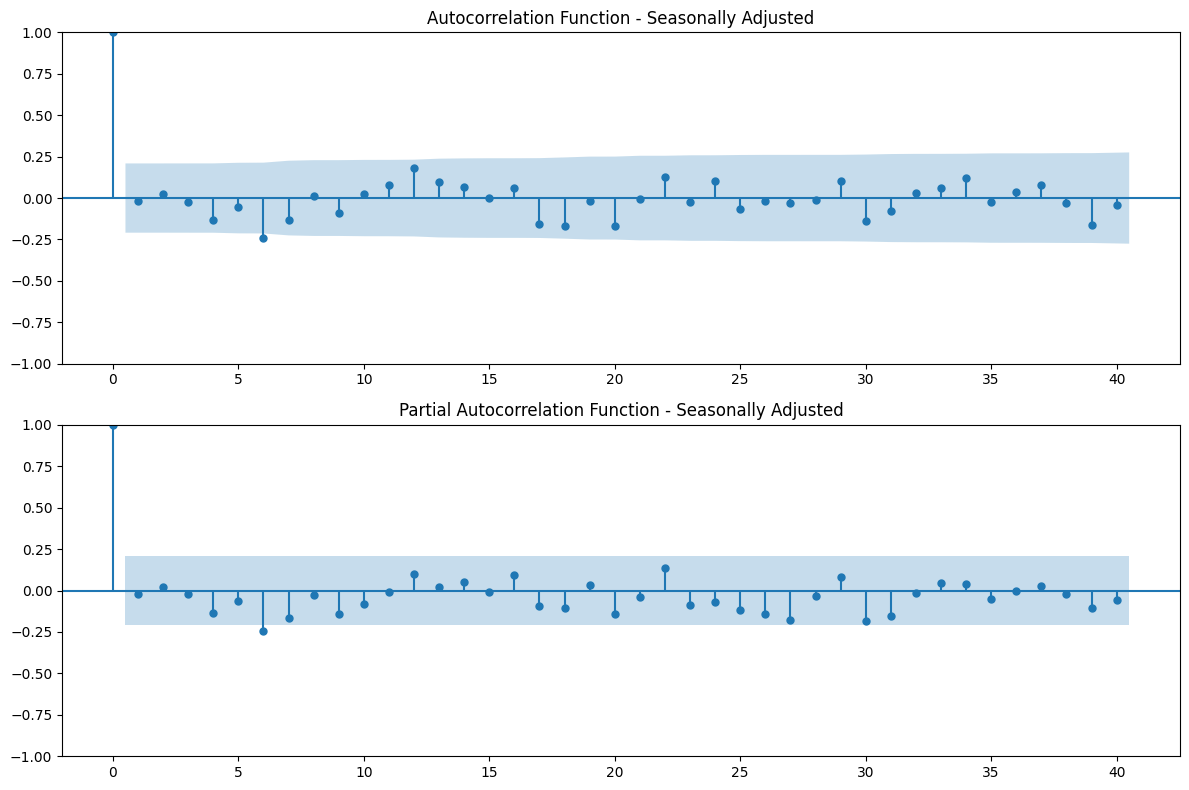

In [63]:
decomposition = seasonal_decompose(weekly_incidents, model='additive', period=52)  # Weekly data, so period is 52
detrended = weekly_incidents - decomposition.trend
detrended = detrended.dropna() 
decomposition.plot()

seasonally_differenced = detrended - detrended.shift(52)
seasonally_differenced = seasonally_differenced.dropna()

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(seasonally_differenced, lags=40, ax=ax[0])  # 2 years of lags
ax[0].set_title('Autocorrelation Function - Seasonally Adjusted')

plot_pacf(seasonally_differenced, lags=40, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function - Seasonally Adjusted')

plt.tight_layout()
plt.show()

/Users/sumiko/anaconda3/envs/dsa3101/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.61968D+00    |proj g|=  2.38489D-01

At iterate    5    f=  2.52681D+00    |proj g|=  1.74229D-02

At iterate   10    f=  2.52272D+00    |proj g|=  4.14622D-03

At iterate   15    f=  2.52223D+00    |proj g|=  1.43022D-03

At iterate   20    f=  2.52215D+00    |proj g|=  2.28554D-04

At iterate   25    f=  2.52214D+00    |proj g|=  8.09939D-05

At iterate   30    f=  2.52214D+00    |proj g|=  1.61541D-04

At iterate   35    f=  2.52213D+00    |proj g|=  8.72527D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

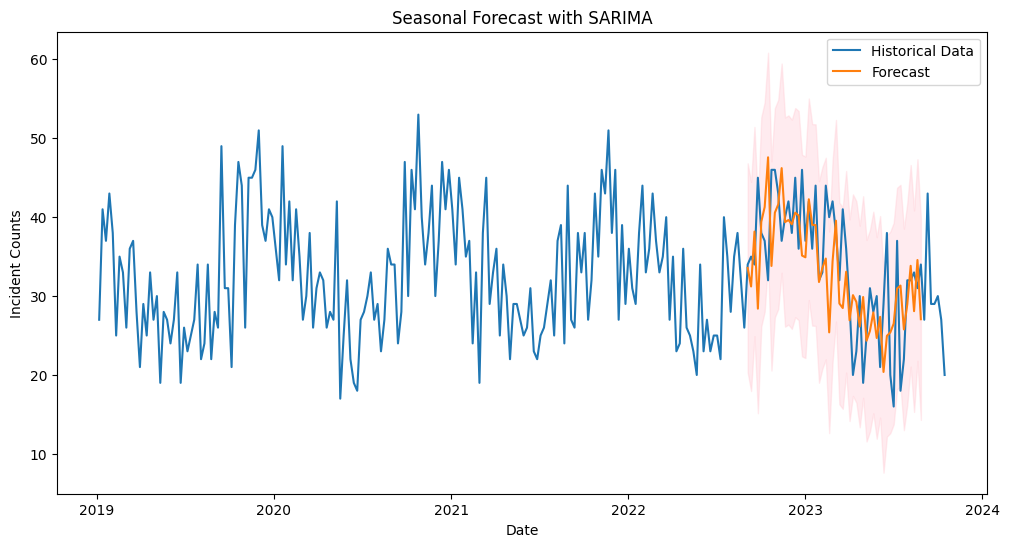

In [64]:
p = 0
d = 0
q = 0
P = 1
D = 1
Q = 1
S = 52

# Initialize and fit the SARIMA model
model = SARIMAX(weekly_incidents, order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

# Make predictions
n_periods = 52  # Forecast periods
forecast = results.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=weekly_incidents.index[-1], periods=n_periods, freq=weekly_incidents.index.freq)

# Confidence intervals for the forecasts
conf_int = forecast.conf_int()

# Actual data

weekly_incidents_all = df['IncidentID'].resample('W').count()  

# Plot the historical data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(weekly_incidents_all, label='Historical Data')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Seasonal Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Incident Counts')
plt.legend()
plt.show()

In [18]:
pip install pmdarima


  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/63/90/5bdc90758dd9cf4c95b7c3f1b259654d521bad1a10177b0f02af2387d1c8/pmdarima-2.0.4-cp310-cp310-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/98/f5/e59d29e1eda2e9efcd9b04e705e5af541c637d082063012790eb04202e9d/Cython-3.0.5-cp310-cp310-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.6/654.6 kB 8.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
from pmdarima import auto_arima


In [13]:

auto_model = auto_arima(weekly_incidents,
                        start_p=0, start_q=0, 
                        max_p=0, max_q=0,     
                        m=52,                 
                        start_P=0, start_Q=0, 
                        max_P=2, max_Q=2,     
                        seasonal=True,        
                        d=0,                  
                        D=1,                  
                        trace=True,           
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=1009.924, Time=0.19 sec
 ARIMA(0,0,0)(1,1,0)[52] intercept   : AIC=980.832, Time=2.33 sec
 ARIMA(0,0,0)(0,1,1)[52] intercept   : AIC=inf, Time=6.58 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=1007.954, Time=0.18 sec
 ARIMA(0,0,0)(2,1,0)[52] intercept   : AIC=inf, Time=12.99 sec
 ARIMA(0,0,0)(1,1,1)[52] intercept   : AIC=inf, Time=10.77 sec
 ARIMA(0,0,0)(2,1,1)[52] intercept   : AIC=977.161, Time=13.41 sec
 ARIMA(0,0,0)(2,1,2)[52] intercept   : AIC=979.161, Time=14.86 sec
 ARIMA(0,0,0)(1,1,2)[52] intercept   : AIC=inf, Time=36.57 sec
 ARIMA(0,0,0)(2,1,1)[52]             : AIC=975.970, Time=9.56 sec
 ARIMA(0,0,0)(1,1,1)[52]             : AIC=inf, Time=8.08 sec
 ARIMA(0,0,0)(2,1,0)[52]             : AIC=inf, Time=5.16 sec
 ARIMA(0,0,0)(2,1,2)[52]             : AIC=inf, Time=17.41 sec
 ARIMA(0,0,0)(1,1,0)[52]             : AIC=978.983, Time=3.15 sec
 ARIMA(0,0,0)(1,1,2)[52]             : AIC=inf, Time=

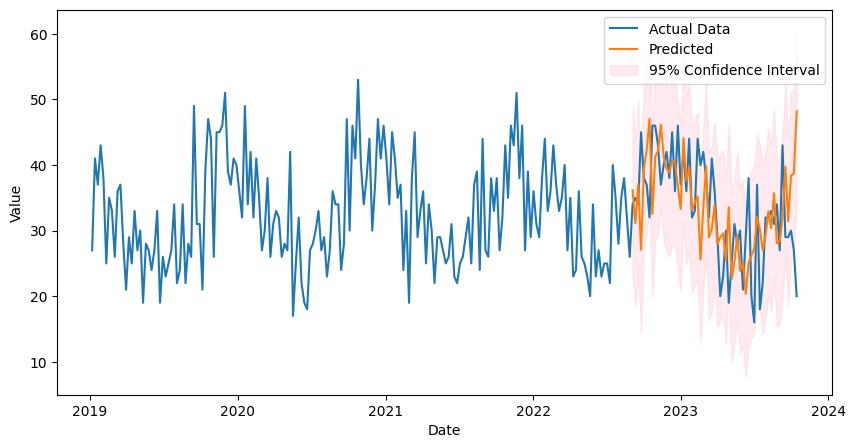

In [27]:
forecast, conf_int = auto_model.predict(n_periods=len(test_weekly_incidents), return_conf_int=True)

forecast_index = test_weekly_incidents.index

weekly_incidents_all = df['IncidentID'].resample('W').count()  


# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(weekly_incidents_all.index, weekly_incidents_all, label='Actual Data')
plt.plot(forecast_index, forecast, label='Predicted')

# Plot the confidence intervals
plt.fill_between(forecast_index,
                 conf_int[:, 0],  # Lower bound of the confidence interval
                 conf_int[:, 1],  # Upper bound of the confidence interval
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()






In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
predictions = auto_model.predict(n_periods=len(test_weekly_incidents))
mae = mean_absolute_error(test_weekly_incidents, predictions)
mse = mean_squared_error(test_weekly_incidents, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_weekly_incidents - predictions) / test)) * 100
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Error (MAE): 6.469397155062584
Mean Squared Error (MSE): 69.60943560108059
Root Mean Squared Error (RMSE): 8.343226929736515
Mean Absolute Percentage Error (MAPE): nan%


In [19]:
def seasonal_naive_forecast(series, n_seasons):
    return series.shift(n_seasons)

# Determine the length of seasons, e.g., 52 for weekly data in a year
n_seasons = 52

# Generate forecasts for the length of the test dataset
# Note: It's assumed here that the test set directly follows the training set in time
seasonal_naive_forecast = seasonal_naive_forecast(weekly_incidents, n_seasons)[-len(test_weekly_incidents):]

# Calculate MAE
mae = mean_absolute_error(test_weekly_incidents, seasonal_naive_forecast)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 7.796610169491525


Text(0, 0.5, 'Incident Counts')

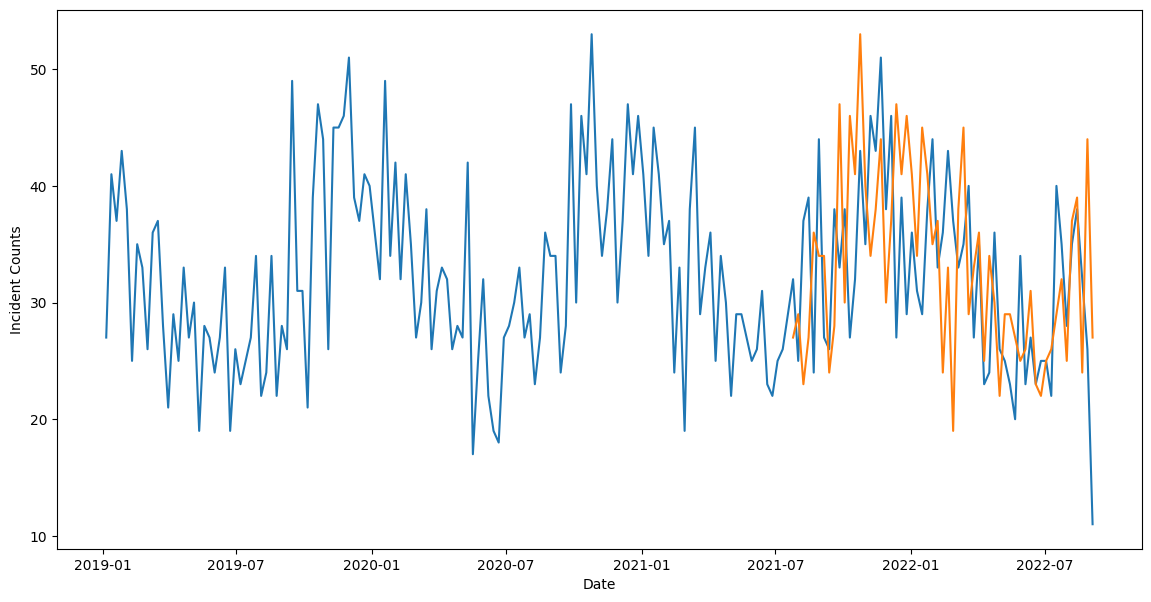

In [28]:
plt.figure(figsize=(14, 7))
plt.plot(weekly_incidents.index, weekly_incidents, label='Actual')
plt.plot(seasonal_naive_forecast.index, seasonal_naive_forecast, label='Seasonal Naive Forecast')
plt.xlabel('Date')
plt.ylabel('Incident Counts')

/Users/sumiko/anaconda3/envs/dsa3101/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67401D+00    |proj g|=  2.26689D-01


 This problem is unconstrained.



At iterate    5    f=  2.58660D+00    |proj g|=  4.64698D-02

At iterate   10    f=  2.51984D+00    |proj g|=  8.91479D-03

At iterate   15    f=  2.51923D+00    |proj g|=  3.48362D-03

At iterate   20    f=  2.51865D+00    |proj g|=  3.55979D-03

At iterate   25    f=  2.51851D+00    |proj g|=  1.14940D-03

At iterate   30    f=  2.51848D+00    |proj g|=  1.46909D-03

At iterate   35    f=  2.51846D+00    |proj g|=  5.80639D-04

At iterate   40    f=  2.51846D+00    |proj g|=  1.38601D-04

At iterate   45    f=  2.51846D+00    |proj g|=  1.40296D-04

At iterate   50    f=  2.51846D+00    |proj g|=  8.24760D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/sumiko/anaconda3/envs/dsa3101/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


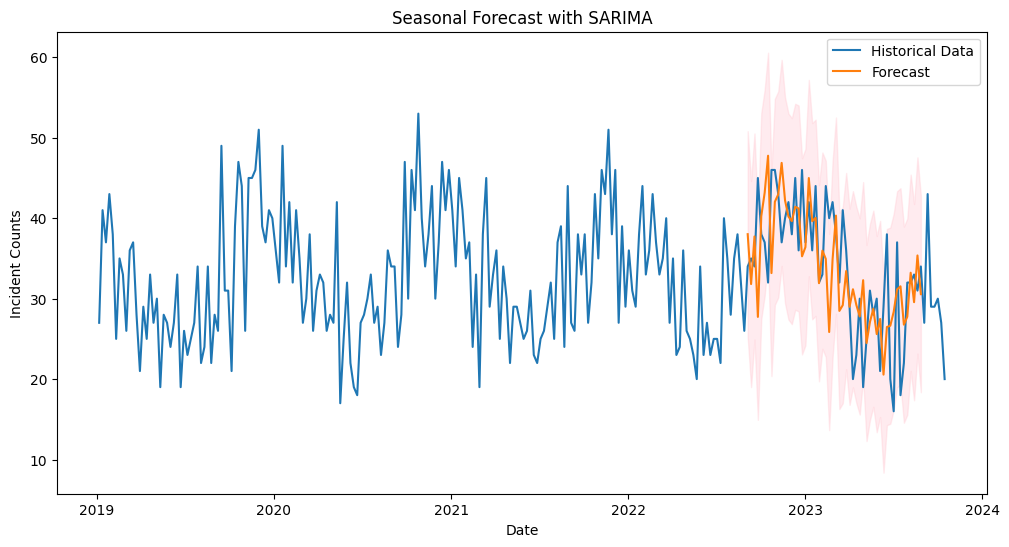

In [28]:
model = SARIMAX(weekly_incidents, order=(1, 1, 1), seasonal_order=(2, 1, 1, 52))
results = model.fit()

# Make predictions
n_periods = 52  
forecast = results.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=weekly_incidents.index[-1], periods=n_periods, freq=weekly_incidents.index.freq)

# Confidence intervals for the forecasts
conf_int = forecast.conf_int()


weekly_incidents_all = df['IncidentID'].resample('W').count()  

# Plot the historical data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(weekly_incidents_all, label='Historical Data')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Seasonal Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Incident Counts')
plt.legend()
plt.show()

In [29]:
forecast = auto_model.predict(n_periods=n_periods)
print(forecast)

forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)
print("Forecasts:", forecast)
print("Confidence Intervals:", conf_int)

2022-09-11    36.160043
2022-09-18    31.114806
2022-09-25    37.059513
2022-10-02    27.101509
2022-10-09    39.466819
2022-10-16    42.310086
2022-10-23    47.047891
2022-10-30    32.531973
2022-11-06    41.236737
2022-11-13    42.157901
2022-11-20    46.132991
2022-11-27    41.286529
2022-12-04    39.472298
2022-12-11    38.878672
2022-12-18    40.660567
2022-12-25    40.278934
2023-01-01    36.847912
2023-01-08    33.308245
2023-01-15    44.080060
2023-01-22    37.582419
2023-01-29    39.623795
2023-02-05    33.150584
2023-02-12    34.286597
2023-02-19    35.200644
2023-02-26    25.586388
2023-03-05    33.519026
2023-03-12    39.812161
2023-03-19    28.951708
2023-03-26    30.267849
2023-04-02    33.887600
2023-04-09    27.949474
2023-04-16    28.963859
2023-04-23    29.593275
2023-04-30    25.500948
2023-05-07    33.569836
2023-05-14    22.645454
2023-05-21    25.184681
2023-05-28    29.275374
2023-06-04    23.869494
2023-06-11    25.163684
2023-06-18    20.361270
2023-06-25    25